In [4]:
import pandas as pd

df = pd.read_csv("C:\\Users\\marth\\OneDrive\\Desktop\\Tasks\\PROJECT\\youtube.csv")
df.head()


,index,video_id,trending_date,title,channel_title,category_id,publish_date,time_frame,published_day_of_week,publish_country,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,13/11/2017,17:00 to 17:59,Monday,US,SHANtell martin,748374,57527,2966,15954,False,False,False
1,1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,13/11/2017,7:00 to 7:59,Monday,US,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False
2,2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,12/11/2017,19:00 to 19:59,Sunday,US,"racist superman|""rudy""""|""""mancuso""""|""""king""""|""...",3191434,146033,5339,8181,False,False,False
3,3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,13/11/2017,11:00 to 11:59,Monday,US,"rhett and link|""gmm""""|""""good mythical morning""...",343168,10172,666,2146,False,False,False
4,4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,12/11/2017,18:00 to 18:59,Sunday,US,"ryan|""higa""""|""""higatv""""|""""nigahiga""""|""""i dare ...",2095731,132235,1989,17518,False,False,False


In [6]:
# ✅ Check what columns you have
df.info()

# ✅ Convert date columns to datetime format (corrected column name)
df['trending_date'] = pd.to_datetime(df['trending_date'], errors='coerce')
df['publish_date'] = pd.to_datetime(df['publish_date'], errors='coerce')

# ✅ Remove rows with missing data
df.dropna(inplace=True)

# ✅ Remove duplicate videos
df.drop_duplicates(subset='video_id', keep='first', inplace=True)

# ✅ See cleaned data
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161470 entries, 0 to 161469
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   index                   161470 non-null  int64         
 1   video_id                161470 non-null  object        
 2   trending_date           60547 non-null   datetime64[ns]
 3   title                   161470 non-null  object        
 4   channel_title           161470 non-null  object        
 5   category_id             161470 non-null  int64         
 6   publish_date            161470 non-null  object        
 7   time_frame              161470 non-null  object        
 8   published_day_of_week   161470 non-null  object        
 9   publish_country         161470 non-null  object        
 10  tags                    161470 non-null  object        
 11  views                   161470 non-null  int64         
 12  likes                   161470

C:\Users\marth\AppData\Local\Temp\ipykernel_11448\919019289.py:6: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['publish_date'] = pd.to_datetime(df['publish_date'], errors='coerce')


,index,video_id,trending_date,title,channel_title,category_id,publish_date,time_frame,published_day_of_week,publish_country,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
3400,3400,6ZfuNTqbHE8,2012-01-17,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29,13:00 to 13:59,Wednesday,US,"marvel|""comics""""|""""comic books""""|""""nerdy""""|""""g...",56367282,2157727,34077,303178,False,False,False
3401,3401,nx1R-eHSkfM,2012-01-17,The New Snapchat in 60 Seconds,Snapchat,10,2017-11-29,14:00 to 14:59,Wednesday,US,"new snapchat|""version 2""""|""""snap inc""""|""""brand...",1894443,0,0,0,True,True,False
3402,3402,XbuQAbG2AZ0,2012-01-17,"Jay-Z and Dean Baquet, in Conversation",The New York Times,25,2017-11-30,14:00 to 14:59,Thursday,US,"The New York Times|""NY Times""""|""""NYT""""|""""Times...",224270,7006,331,1127,False,False,False
3403,3403,evhLzq7Gsak,2012-01-17,Matt Lauer Has Been Fired From NBC News | TODAY,TODAY,25,2017-11-29,14:00 to 14:59,Wednesday,US,"The TODAY Show|""TODAY Show""""|""""TODAY""""|""""NBC""""...",1717225,10041,4266,9335,False,False,False
3404,3404,KXHrCBkIxQQ,2012-01-17,ALL THE MONEY IN THE WORLD - Official Trailer ...,Sony Pictures Entertainment,24,2017-11-29,20:00 to 20:59,Wednesday,US,"mark wahlberg|""marky mark""""|""""all the money in...",616077,5816,934,1116,False,False,False


In [7]:
!pip install textblob
from textblob import TextBlob

df['title_sentiment'] = df['title'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

def get_label(score):
    if score > 0.1:
        return "Positive"
    elif score < -0.1:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['title_sentiment'].apply(get_label)
df[['title', 'title_sentiment', 'sentiment']].head()

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---

,title,title_sentiment,sentiment
3400,Marvel Studios' Avengers: Infinity War Officia...,0.000000,Neutral
3401,The New Snapchat in 60 Seconds,0.136364,Positive
3402,"Jay-Z and Dean Baquet, in Conversation",0.000000,Neutral
3403,Matt Lauer Has Been Fired From NBC News | TODAY,0.000000,Neutral
3404,ALL THE MONEY IN THE WORLD - Official Trailer ...,0.000000,Neutral


In [9]:
df.to_csv('cleaned_youtube_trending.csv', index=False)


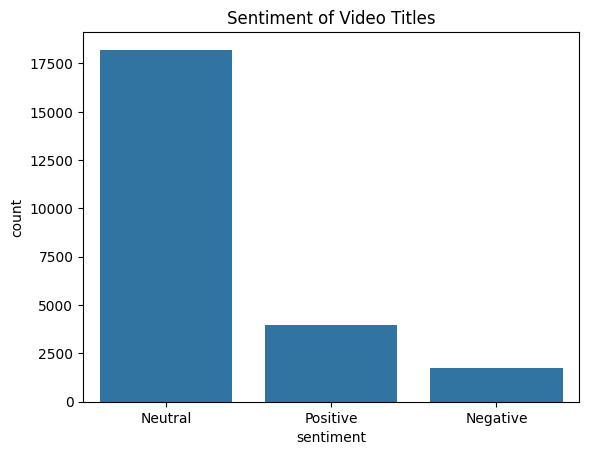

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment', data=df)
plt.title("Sentiment of Video Titles")
plt.show()
